BTC/LTC.csv have: <br>
Date,Open,High,Low,Close,Adj Close,Volume

In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Example data loading (replace with actual data source)
btc_data = pd.read_csv('BTC1H.csv')
eth_data = pd.read_csv('ETH1H.csv')

# Merge DataFrames on the 'Date' column, keeping only the 'Date' and 'close' columns
merged_data = pd.merge(btc_data[['Date', 'close']], eth_data[['Date', 'close']], on='Date', how='inner')

# Rename columns for clarity
merged_data.columns = ['Date', 'BTC_close', 'ETH_close']
merged_data_short2 = merged_data[merged_data['Date'] >= '2024-05-01']
merged_data.set_index('Date', inplace=True)
merged_data

,BTC_close,ETH_close
Date,,
2018-01-01 00:00:00,13529.01,727.62
2018-01-01 01:00:00,13203.06,717.97
2018-01-01 02:00:00,13330.18,724.05
2018-01-01 03:00:00,13410.03,734.50
2018-01-01 04:00:00,13601.01,744.82
...,...,...
2024-05-18 19:00:00,66912.62,3119.69
2024-05-18 20:00:00,66964.01,3120.00
2024-05-18 21:00:00,66899.29,3115.79


Correlation between present day's ETH closing price and next day's BTC closing price:0.9276548251947665


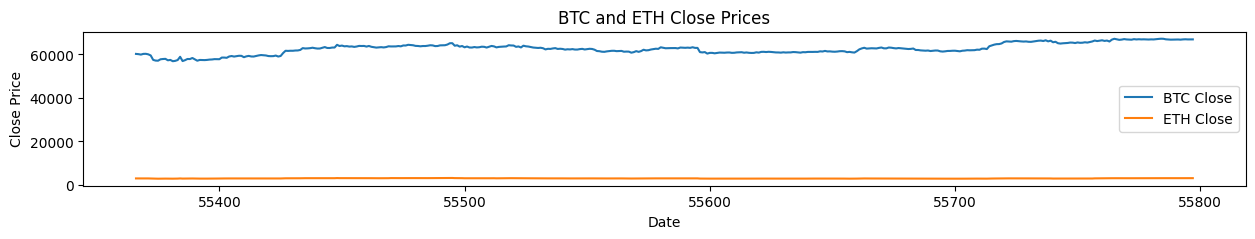

Correlation between present day's ETH closing price and next day's BTC closing price:0.9276548251947665


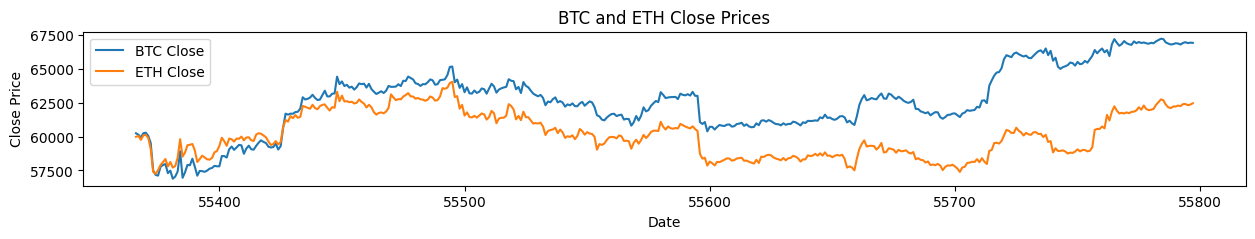

In [240]:
merged_data_short = merged_data


correlation = np.corrcoef(merged_data_short['ETH_close'], merged_data_short[f'BTC_close'])[0, 1]
# Print correlation and the first few rows of the dataset for verification
print(f"Correlation between present day's ETH closing price and next day's BTC closing price:{correlation}")
plt.figure(figsize=(15, 2))
plt.plot(merged_data_short2.index, merged_data_short2['BTC_close'], label='BTC Close')
plt.plot(merged_data_short2.index, merged_data_short2['ETH_close'], label='ETH Close')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('BTC and ETH Close Prices')
plt.legend()
plt.show()
correlation = np.corrcoef(merged_data['ETH_close'], merged_data[f'BTC_close'])[0, 1]
# Print correlation and the first few rows of the dataset for verification
print(f"Correlation between present day's ETH closing price and next day's BTC closing price:{correlation}")
plt.figure(figsize=(15, 2))
plt.plot(merged_data_short2.index, merged_data_short2['BTC_close'], label='BTC Close')
plt.plot(merged_data_short2.index, merged_data_short2['ETH_close']*20, label='ETH Close')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('BTC and ETH Close Prices')
plt.legend()
plt.show()

Prepare Training & Test Sets and Standardize the Data

In [241]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt
# from torch.optim.lr_scheduler import ReduceLROnPlateau

# torch.cuda.empty_cache()

# # Set device to GPU if available
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(device)

# # Assuming 'merged_data_short' is a DataFrame with 'BTC_close' and 'ETH_close' columns
# data = merged_data_short[['BTC_close', 'ETH_close']]

# # Normalize the data
# scaler = MinMaxScaler()
# data_scaled = scaler.fit_transform(data)

# # Prepare sequences of the last 6 hours for every 5 minutes 5*72 = 360 minutes = 6 hours
# sequence_length = 72
# hidden_size = 64  # Adjusted hidden size
# num_layers = 2    # Increased number of layers
# epochs = 0      # Increased number of epochs
# batch_size = 512  # Adjusted batch size
# early_stop_epoch = 200

# def create_sequences(data, seq_length):
#     xs, ys = [], []
#     for i in range(len(data) - seq_length):
#         x = data[i:i+seq_length, 0]  # Using only BTC Price as feature
#         y = data[i+seq_length, 1]    # ETH Price as target
#         xs.append(x)
#         ys.append(y)
#     return np.array(xs), np.array(ys)

# X, y = create_sequences(data_scaled, sequence_length)

# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# # Convert data to PyTorch tensors
# X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
# y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
# X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
# y_test = torch.tensor(y_test, dtype=torch.float32).to(device)

# # Define the neural network
# class ETHPricePredictor(nn.Module):
#     def __init__(self):
#         super(ETHPricePredictor, self).__init__()
#         self.lstm = nn.LSTM(input_size=1, hidden_size=hidden_size, num_layers=num_layers, batch_first=True, dropout=0.2)
#         self.fc = nn.Linear(hidden_size, 1)

#     def forward(self, x):
#         x = x.unsqueeze(-1)  # Add feature dimension
#         h_0 = torch.zeros(num_layers, x.size(0), hidden_size).to(device)  # Initialize hidden state
#         c_0 = torch.zeros(num_layers, x.size(0), hidden_size).to(device)  # Initialize cell state
#         out, _ = self.lstm(x, (h_0, c_0))
#         out = out[:, -1, :]  # Get the last time step output
#         out = self.fc(out)
#         return out

# model = ETHPricePredictor().to(device)

# # Load the model state if it exists
# try:
#     model.load_state_dict(torch.load('model2.pkl'))
#     print("Model loaded successfully")
# except FileNotFoundError:
#     print("Model file not found, starting training from scratch")

# # Define loss function and optimizer
# criterion = nn.SmoothL1Loss()
# optimizer = optim.Adam(model.parameters(), lr=0.00001)

# # Learning rate scheduler
# scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)

# # Early stopping parameters
# min_loss = float('inf')
# epoch_count = 0

# # Define your data loader
# train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)

# # Train the model
# for epoch in range(epochs):
#     model.train()
#     epoch_loss = 0.0
#     for i, (X_batch, y_batch) in enumerate(train_loader):
#         optimizer.zero_grad()
#         output = model(X_batch)
#         loss = criterion(output.squeeze(), y_batch)
#         loss.backward()
#         # Gradient clipping
#         nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
#         optimizer.step()
#         epoch_loss += loss.item()
    
#     avg_epoch_loss = epoch_loss / len(train_loader)
    
#     # Update learning rate based on validation loss
#     scheduler.step(avg_epoch_loss)
    
#     if (epoch + 1) % 1 == 0:
#         print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_epoch_loss:.10f}')
#         if avg_epoch_loss < min_loss:
#             min_loss = avg_epoch_loss
#             #torch.save(model.state_dict(), 'model2.pkl')
#             epoch_count = 0
#             print(f"Model saved with loss {min_loss:.20f}")
#         else:
#             epoch_count += 1
#             print(f"No improvement, count: {epoch_count}")
            
#     if epoch_count > early_stop_epoch:
#         print("Early stopping")
#         break

# # Evaluate the model in batches to avoid OOM
# model.eval()
# predictions = []
# with torch.no_grad():
#     for i in range(0, X_test.size(0), batch_size):
#         X_batch = X_test[i:i+batch_size]
#         output = model(X_batch)
#         predictions.append(output.cpu().numpy())
        
# predictions = np.concatenate(predictions).squeeze()
# test_loss = criterion(torch.tensor(predictions).to(device), y_test)
# print(f'Test Loss: {test_loss.item():.8f}')

# # Convert predictions back to original scale
# predicted_prices = scaler.inverse_transform(
#     np.concatenate((np.zeros((predictions.shape[0], 1)), predictions.reshape(-1, 1)), axis=1)
# )[:, 1]
# actual_prices = scaler.inverse_transform(
#     np.concatenate((np.zeros((y_test.shape[0], 1)), y_test.cpu().numpy().reshape(-1, 1)), axis=1)
# )[:, 1]

# # Print sample results
# for i in range(10):
#     print(f'Predicted: {predicted_prices[i]:.2f}, Actual: {actual_prices[i]:.2f}')
# #Model saved with loss 0.0033346157
# #Model saved with loss 0.0033296287

In [242]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import ReduceLROnPlateau

torch.cuda.empty_cache()

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# Assuming 'merged_data_short' is a DataFrame with 'BTC_close' and 'ETH_close' columns
data = merged_data_short[['BTC_close', 'ETH_close']]

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Prepare sequences of the last 6 hours for every 5 minutes 5*72 = 360 minutes = 6 hours
sequence_length = 72
hidden_size = 100  # Adjusted hidden size
num_layers = 2     # Adjusted number of layers
epochs = 1000      # Increase epochs
batch_size = 512   # Use mini-batches to reduce memory usage
early_stop_patience = 100

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length, 0]  # Using only BTC Price as feature
        y = data[i+seq_length, 1]    # ETH Price as target
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

X, y = create_sequences(data_scaled, sequence_length)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).to(device)

# Define the neural network
class ETHPricePredictor(nn.Module):
    def __init__(self):
        super(ETHPricePredictor, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=hidden_size, num_layers=num_layers, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = x.unsqueeze(-1)  # Add feature dimension
        h_0 = torch.zeros(num_layers, x.size(0), hidden_size).to(device)  # Initialize hidden state
        c_0 = torch.zeros(num_layers, x.size(0), hidden_size).to(device)  # Initialize cell state
        out, _ = self.lstm(x, (h_0, c_0))
        out = out[:, -1, :]  # Get the last time step output
        out = self.fc(out)
        return out

model = ETHPricePredictor().to(device)

# Load the model state if it exists
try:
    model.load_state_dict(torch.load('model1.pkl'))
    print("Model loaded successfully")
except FileNotFoundError:
    print("Model file not found, starting training from scratch")

# Define loss function and optimizer
criterion = nn.SmoothL1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)  # Added L2 regularization

# Learning rate scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.01, patience=10, verbose=True)

# Early stopping parameters
min_loss = float('inf')
early_stop_count = 0

# Define your data loader
train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)

# Train the model
for epoch in range(epochs):
    model.train()
    epoch_loss = 0.0
    for i, (X_batch, y_batch) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output.squeeze(), y_batch)
        loss.backward()
        # Gradient clipping
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
        optimizer.step()
        epoch_loss += loss.item()
    
    avg_epoch_loss = epoch_loss / len(train_loader)
    
    # Update learning rate based on validation loss
    scheduler.step(avg_epoch_loss)
    
    if (epoch + 1) % 1 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_epoch_loss:.8f}')
        if avg_epoch_loss < min_loss:
            min_loss = avg_epoch_loss
            torch.save(model.state_dict(), 'model1.pkl')
            early_stop_count = 0
            print(f"Model saved with loss {min_loss:.8f}")
        else:
            early_stop_count += 1
            print(f"No improvement, count: {early_stop_count}")

            
    if early_stop_count > early_stop_patience:
        print("Early stopping")
        break

# Evaluate the model in batches to avoid OOM
model.eval()
predictions = []
with torch.no_grad():
    for i in range(0, X_test.size(0), batch_size):
        X_batch = X_test[i:i+batch_size]
        output = model(X_batch)
        predictions.append(output.cpu().numpy())
        
predictions = np.concatenate(predictions).squeeze()
test_loss = criterion(torch.tensor(predictions).to(device), y_test)
print(f'Test Loss: {test_loss.item():.8f}')

# Convert predictions back to original scale
predicted_prices = scaler.inverse_transform(
    np.concatenate((np.zeros((predictions.shape[0], 1)), predictions.reshape(-1, 1)), axis=1)
)[:, 1]
actual_prices = scaler.inverse_transform(
    np.concatenate((np.zeros((y_test.shape[0], 1)), y_test.cpu().numpy().reshape(-1, 1)), axis=1)
)[:, 1]

# Print sample results
for i in range(10):
    print(f'Predicted: {predicted_prices[i]:.2f}, Actual: {actual_prices[i]:.2f}')

# Calculate evaluation metrics
mae = np.mean(np.abs(predicted_prices - actual_prices))
mse = np.mean((predicted_prices - actual_prices)**2)
rmse = np.sqrt(mse)

# Print evaluation metrics
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')

# Store the results in a list for comparison
model_ratings = [mae, mse, rmse]
print(f'Model Ratings: {model_ratings}')


cuda
Model loaded successfully
Epoch [1/1000], Loss: 0.00794527
Model saved with loss 0.00794527
Epoch [2/1000], Loss: 0.00444799
Model saved with loss 0.00444799
Epoch [3/1000], Loss: 0.00445373
No improvement, count: 1
Epoch [4/1000], Loss: 0.00443036
Model saved with loss 0.00443036
Epoch [5/1000], Loss: 0.00447903
No improvement, count: 1
Epoch [6/1000], Loss: 0.00448691
No improvement, count: 2
Epoch [7/1000], Loss: 0.00450214
No improvement, count: 3
Epoch [8/1000], Loss: 0.00446611
No improvement, count: 4
Epoch [9/1000], Loss: 0.00447941
No improvement, count: 5
Epoch [10/1000], Loss: 0.00446154
No improvement, count: 6
Epoch [11/1000], Loss: 0.00449341
No improvement, count: 7
Epoch [12/1000], Loss: 0.00444525
No improvement, count: 8
Epoch [13/1000], Loss: 0.00448273
No improvement, count: 9
Epoch [14/1000], Loss: 0.00449241
No improvement, count: 10
Epoch 00015: reducing learning rate of group 0 to 1.0000e-05.
Epoch [15/1000], Loss: 0.00443277
No improvement, count: 11
Epoch

In [243]:
# MAE MSE RMSE0.00376283
#[224.83183658296218, 83939.83672971389, 289.7237248305942]
#[398.90665054550067, 303175.9772815681, 550.6141818747208]
#[400.855873939357, 302892.5531027897, 550.3567507560797]
#[239.53500421147805, 93175.94332930623, 305.2473477842293]
#[238.2700864640117, 92641.1687534937, 304.3701180364027]
#[237.9094453586917, 92422.66688308927, 304.01096507048766]
#[238.00566570856574, 92504.84181269462, 304.14608630178793]
#[237.77919935939042, 92401.8454408978, 303.97671858367346]
#[218.90863496717768, 79917.47007010943, 282.6967811456463]

In [249]:

# Print sample results
for i in range(10):
    print(f'Predicted: {predicted_prices[i]:.40f}, Actual: {actual_prices[i]:.10f}')



Predicted: 1363.7561154502629960916237905621528625488281, Actual: 1640.1499774897
Predicted: 1362.8791583007573535724077373743057250976562, Actual: 1637.5899612254
Predicted: 1362.0374157518149331735912710428237915039062, Actual: 1632.0800121921
Predicted: 1361.1050808030367988976649940013885498046875, Actual: 1622.8100525826
Predicted: 1359.9713978558779672312084585428237915039062, Actual: 1623.5600667769
Predicted: 1358.7560681533814204158261418342590332031250, Actual: 1621.8399471349
Predicted: 1357.4663334077597482973942533135414123535156, Actual: 1579.8100434136
Predicted: 1355.3543093401194710168056190013885498046875, Actual: 1577.0999391139
Predicted: 1352.6169421237707410909933969378471374511719, Actual: 1540.5500236166
Predicted: 1349.2741109687090101942885667085647583007812, Actual: 1537.9900073522


0.9450253209865197


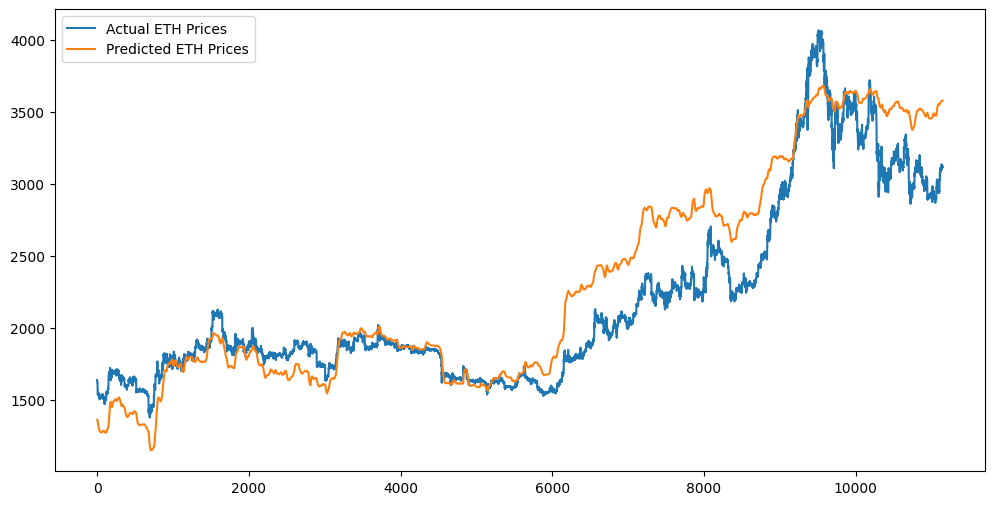

In [250]:
correlation = np.corrcoef(predicted_prices, actual_prices)[0, 1]
print(correlation)
# Plot predictions vs actual prices
plt.figure(figsize=(12, 6))
x1 = np.linspace(0, 1, 133857)
x2 = np.linspace(0, 1, 133857)
plt.plot(actual_prices, label='Actual ETH Prices')
plt.plot(predicted_prices, label='Predicted ETH Prices')
plt.legend()
plt.show()


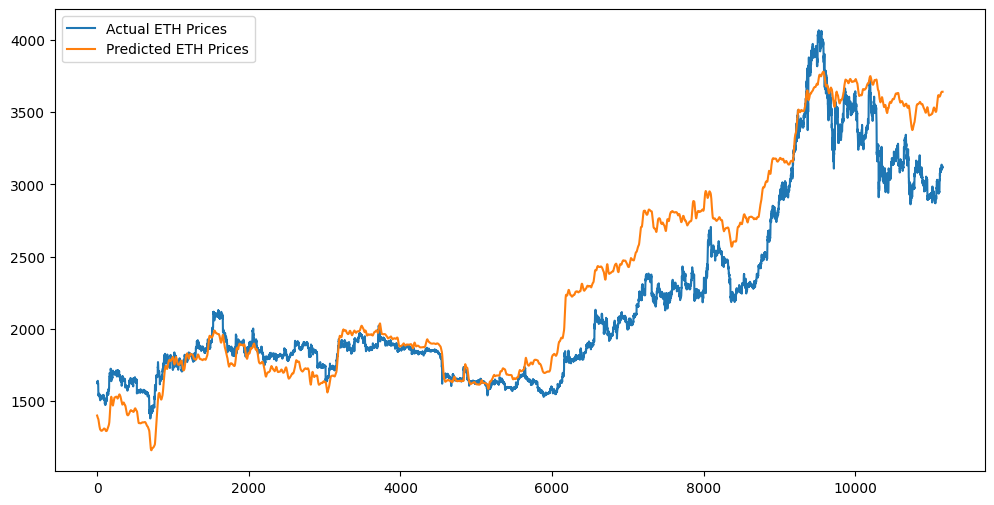

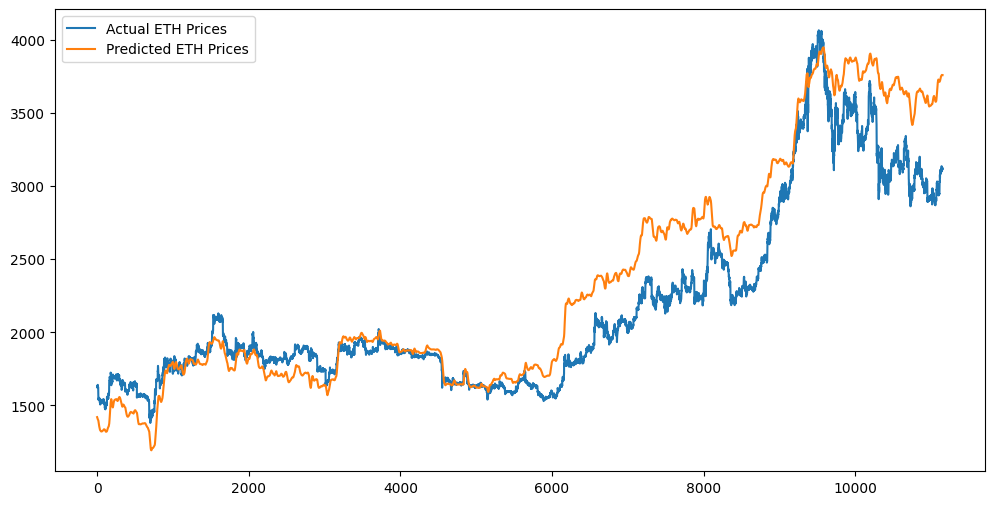

In [246]:
0.9235370600614433

0.9235370600614433

In [247]:
rms = 0
for i in range(len(predicted_prices)):
    rms += ((predicted_prices[i]-actual_prices[i])*(predicted_prices[i]-actual_prices[i]))
rms = rms/len(predicted_prices)
print('#',hidden_size,',',num_layers,',',rms)
#layer , hidden layer size,rms
#2 , 80 , 496915.1696711829
#5 , 10 , 309543.02344859124
#10 , 5 , 338850.87313277187
#10 , 10 , 341992.9274608662
#5 , 5 , 215662.9012895165  ***
#6 , 6 , 282112.07170788007
#3 , 5 , 271099.2154661211
# 3 , 3 , 301429.70575677836
# 4 , 4 , 327716.4057110517

# 100 , 2 , 79917.47007010964


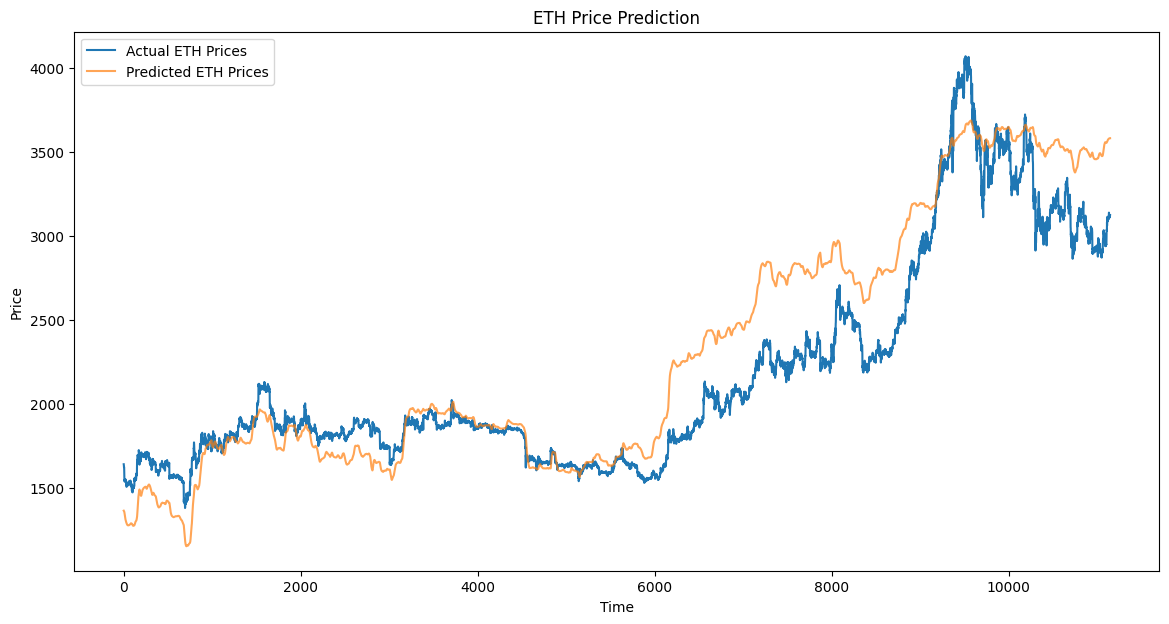

In [248]:
# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(actual_prices, label='Actual ETH Prices')
plt.plot(predicted_prices, label='Predicted ETH Prices', alpha=0.7)
plt.title('ETH Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()